*Here the attempt has been made to do initial data exploratory analysis and then depending on understading of data,*
*perform data cleaning*

In [49]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [50]:
#reading csv
df1 = pd.read_csv("..\data\AB_NYC_2019.csv")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Categorical Variable types we have are:
1. host_name
2. neighbourhood_group
3. neighbourhood
4. room_type(private,shared,Entire home/apt)

In [51]:
df1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [52]:
df1.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [53]:
df1.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

<sub> null values are in both review labels, name and hostname
and those variables don't seem to be useful for us </sub>

In [54]:
mean = df1['reviews_per_month'].mean()
df1['reviews_per_month'].fillna(mean, inplace=True)

In [55]:
#dropping columns
df_price = df1['price'].to_list
df1= df1.drop(['name', 'id', 'host_name', 'last_review'],axis=1,)

In [56]:
df1.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [57]:
ng_p=df1.groupby("neighbourhood_group")["price"].mean()
ng_p

neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64

In [58]:
df1["price"].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

Average price is 152, it varies from 0 to 10k bucks

In [59]:
host_id_counts = df1["host_id"].value_counts()
max_host = host_id_counts.idxmax()
max_host
#the host with most listings

219517861

This popular host is a startup company Sonder, which explains why they have the most listings

In [60]:
df1["minimum_nights"].corr(df1["price"])

0.04279933414330345

In [61]:
df1["availability_365"].describe()
#histogram of 365 availability is done below

count    48895.000000
mean       112.781327
std        131.622289
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64

# Plotting graphs

<AxesSubplot:>

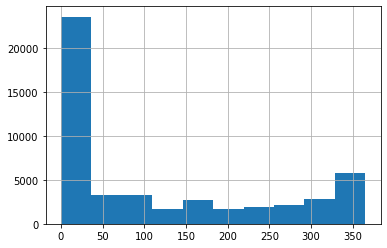

In [62]:
hist_av=df1["availability_365"].hist()
hist_av

C:\Users\Eshan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Neighbourhood Group')

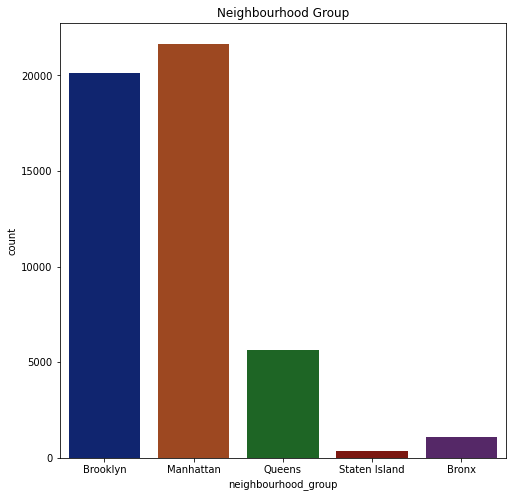

In [63]:
sns.countplot(df1['neighbourhood_group'], palette="dark")
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.title('Neighbourhood Group')

Text(0.5, 1.0, 'Room Type vs Price')

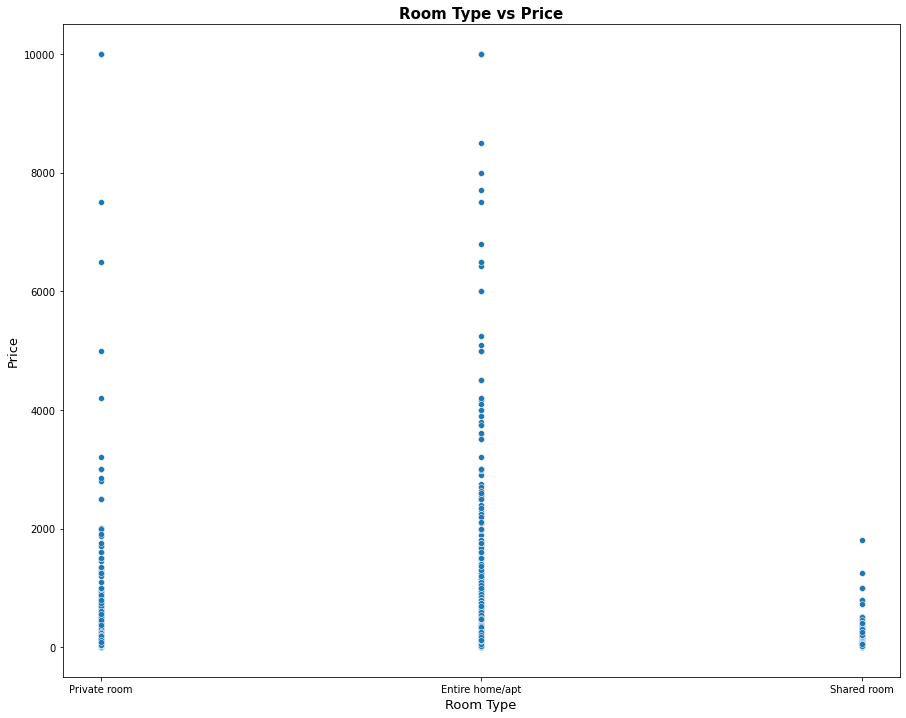

In [64]:
plt.figure(figsize=(15,12))
sns.scatterplot(x='room_type', y='price', data=df1)

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price",size=15, weight='bold')

Text(0.5, 1.0, 'Room Type vs Price vs Neighbourhood Group')

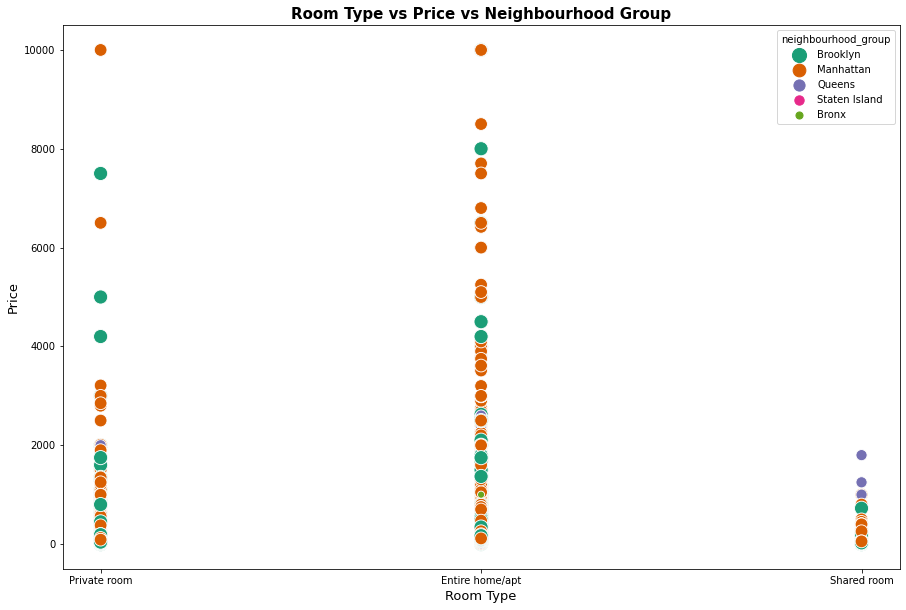

In [65]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="room_type", y="price",
            hue="neighbourhood_group", size="neighbourhood_group",
            sizes=(50, 200), palette="Dark2", data=df1)

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price vs Neighbourhood Group",size=15, weight='bold')

Index(['neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

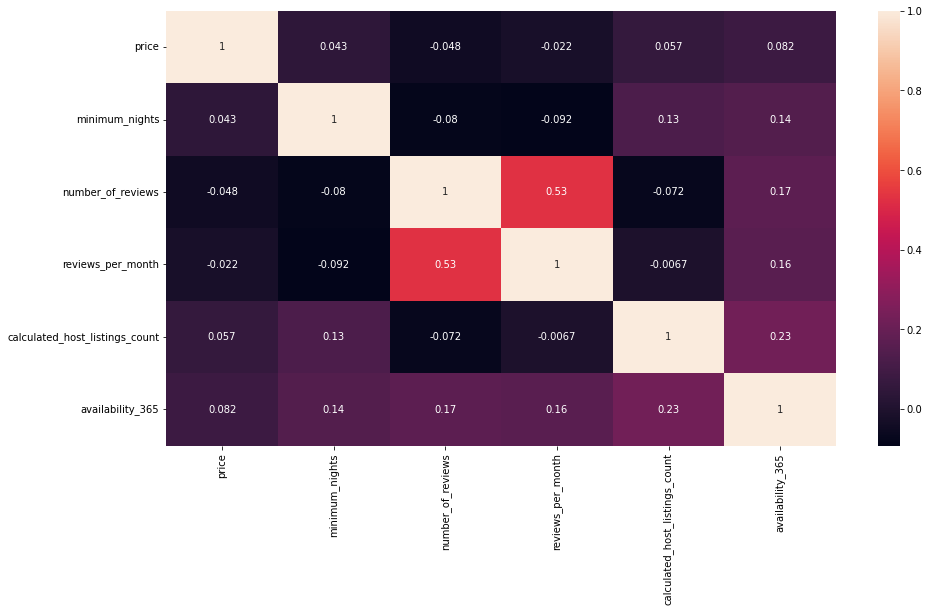

In [66]:
#drop more columns before correlation matrix with pearson method
#we cannot really use host_id for modelling
df1 = df1.drop(["host_id","latitude","longitude"], axis=1)
corr = df1.corr(method='pearson')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
df1.columns

In [67]:
#do categorial data handling here
dataset_onehot2 = pd.get_dummies(df1, columns=['neighbourhood_group',"neighbourhood","room_type"], prefix = ['ng',"nh","rt"],drop_first=True)

**Exporting data**

In [68]:
#exporting final to data folder
df1.to_csv("../data/abnyc_final.csv", index=False)

In [69]:
'''
going forward with this as of now
Shuffle your dataset 
'''
shuffle_df = df1.sample(frac=1)

# Define a size for your train set 
train_size = int(0.7 * len(df1))
test_size = int(0.5 * 0.3 * len(df1))

# Split your dataset 
train_set = shuffle_df[:train_size]
temp_set = shuffle_df[train_size:]

validation_set = temp_set[test_size:]
test_set = temp_set[test_size:]

In [70]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7335 entries, 18723 to 40630
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             7335 non-null   object 
 1   neighbourhood                   7335 non-null   object 
 2   room_type                       7335 non-null   object 
 3   price                           7335 non-null   int64  
 4   minimum_nights                  7335 non-null   int64  
 5   number_of_reviews               7335 non-null   int64  
 6   reviews_per_month               7335 non-null   float64
 7   calculated_host_listings_count  7335 non-null   int64  
 8   availability_365                7335 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 573.0+ KB


In [71]:
#exporting train test split
train_set.to_csv("../data/abnyc_train.csv", index=False)
test_set.to_csv("../data/abnyc_test.csv", index=False)
validation_set.to_csv("../data/abnyc_validation.csv", index=False)